In [1]:
import pandas as pd
from scipy import stats
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.ticker as ticker
import matplotlib.mlab as mlab
import matplotlib.animation as animation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [2]:
kcc = pd.read_csv('C:/Users/cynni/OneDrive/Desktop/Kidney411/kccshort4.csv')
kcc.head()

,Offers_home_hemodialysis_training,severe_anemic_patients,percent_of_Adult_HD_patients_with_KtVnormal,Mortality_Rate_facility,Readmission_Rate_facility,Hospitalization_Rate_facility,Transfusions_Rate_facility,Fistula_Rate_facility,number_of_patients_for_PPPW,Offers_in_center_hemodialysis
0,1,24,100,28.1,31.8,328.4,62.4,73.7,46,1
1,0,33,99,28.2,26.9,190.8,53.6,33.8,64,1
2,0,21,98,14.4,25.8,202.1,23.5,55.9,63,1
3,1,17,97,25.2,32.6,241.3,48.9,36.6,86,1
4,1,0,98,23.6,27.8,127.8,15.8,65.9,47,1


# Clean Data

Lower case for easier access to data

In [3]:
kcc.columns = [x.lower() for x in kcc.columns]
kcc.columns = [ x.replace(' ', '_' ) for x in kcc.columns]
kcc.columns

Index(['offers_home_hemodialysis_training', 'severe_anemic_patients',
       'percent_of_adult_hd_patients_with_ktvnormal',
       'mortality_rate_facility', 'readmission_rate_facility',
       'hospitalization_rate_facility', 'transfusions_rate_facility',
       'fistula_rate_facility', 'number_of_patients_for_pppw',
       'offers_in_center_hemodialysis'],
      dtype='object')

Drop missing values

In [4]:
kcc2 = kcc.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [5]:
kcc2.head()

,offers_home_hemodialysis_training,severe_anemic_patients,percent_of_adult_hd_patients_with_ktvnormal,mortality_rate_facility,readmission_rate_facility,hospitalization_rate_facility,transfusions_rate_facility,fistula_rate_facility,number_of_patients_for_pppw,offers_in_center_hemodialysis
0,1,24,100,28.1,31.8,328.4,62.4,73.7,46,1
1,0,33,99,28.2,26.9,190.8,53.6,33.8,64,1
2,0,21,98,14.4,25.8,202.1,23.5,55.9,63,1
3,1,17,97,25.2,32.6,241.3,48.9,36.6,86,1
4,1,0,98,23.6,27.8,127.8,15.8,65.9,47,1


# Converting Floats to Whole Numbers

In [6]:
kcc2['mortality_rate_facility'] = kcc2['mortality_rate_facility'].apply(lambda x : int(x))
kcc2['readmission_rate_facility'] = kcc2['readmission_rate_facility'].apply(lambda x : int(x))
kcc2['hospitalization_rate_facility'] = kcc2['hospitalization_rate_facility'].apply(lambda x : int(x))
kcc2['transfusions_rate_facility'] = kcc2['transfusions_rate_facility'].apply(lambda x : int(x))
kcc2['fistula_rate_facility'] = kcc2['fistula_rate_facility'].apply(lambda x : int(x))

In [7]:
kcc2['mortality_rate_facility'].value_counts()

21    86
23    78
22    76
24    71
19    65
26    60
20    60
18    56
25    56
27    51
17    46
16    39
0     35
28    30
29    27
32    27
15    23
30    20
33    19
14    16
31    15
34    11
13    10
35     8
11     6
12     5
36     5
38     5
46     3
9      3
37     3
6      2
41     2
43     2
40     2
8      2
7      1
39     1
10     1
47     1
48     1
59     1
65     1
71     1
73     1
74     1
83     1
Name: mortality_rate_facility, dtype: int64

testing histogram

<AxesSubplot:>

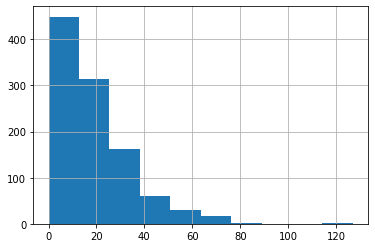

In [8]:
kcc2['transfusions_rate_facility'].hist()

# HeatMap

<AxesSubplot:>

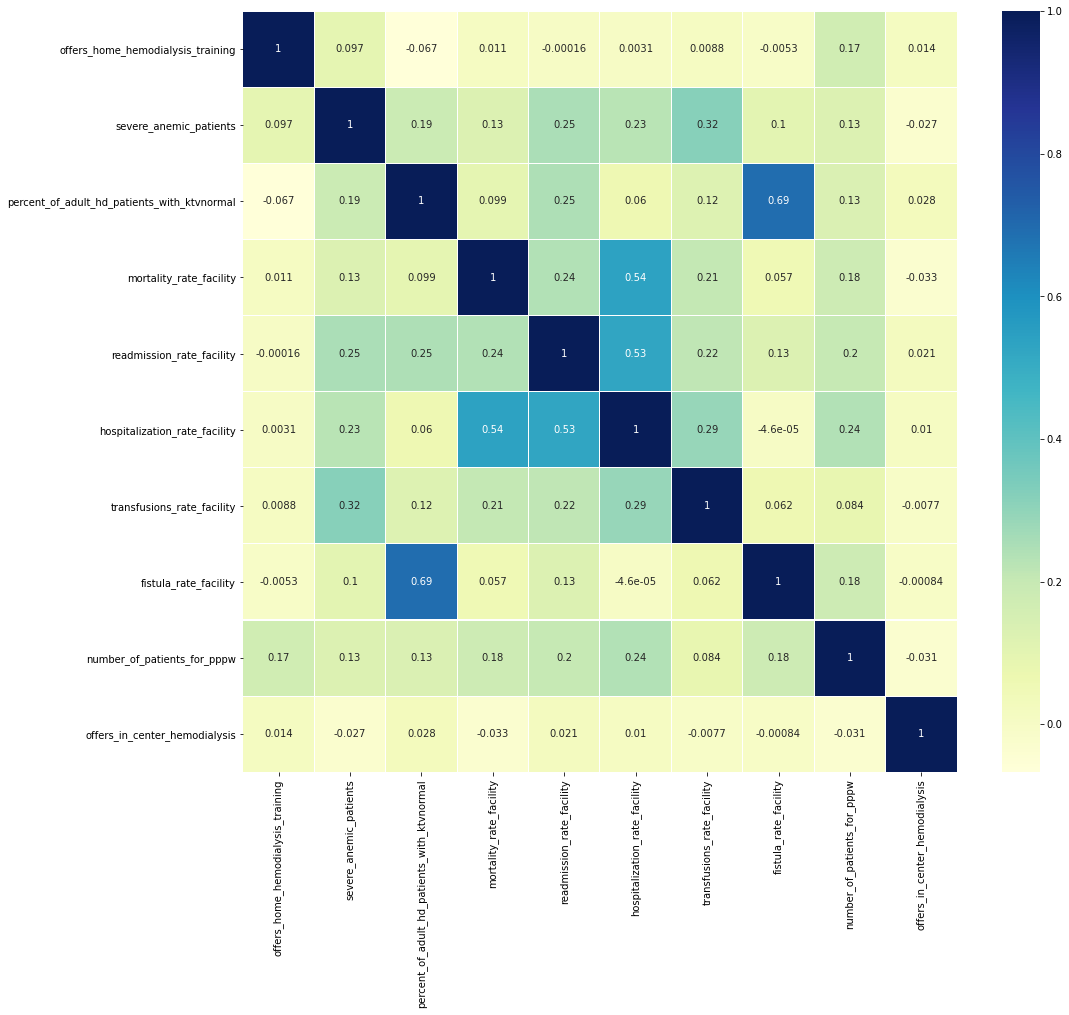

In [9]:
plt.figure(figsize= (16,14))
sns.heatmap(kcc2.corr(), cmap= "YlGnBu",linewidths= .1, annot = True )

In [10]:
kcc2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap= plt.get_cmap('coolwarm'), axis=1)

,offers_home_hemodialysis_training,severe_anemic_patients,percent_of_adult_hd_patients_with_ktvnormal,mortality_rate_facility,readmission_rate_facility,hospitalization_rate_facility,transfusions_rate_facility,fistula_rate_facility,number_of_patients_for_pppw,offers_in_center_hemodialysis
offers_home_hemodialysis_training,1.0,0.097,-0.067,0.011,-0.00016,0.0031,0.0088,-0.0053,0.17,0.014
severe_anemic_patients,0.097,1.0,0.19,0.13,0.25,0.23,0.32,0.1,0.13,-0.027
percent_of_adult_hd_patients_with_ktvnormal,-0.067,0.19,1.0,0.099,0.25,0.06,0.12,0.69,0.13,0.028
mortality_rate_facility,0.011,0.13,0.099,1.0,0.24,0.54,0.21,0.057,0.18,-0.033
readmission_rate_facility,-0.00016,0.25,0.25,0.24,1.0,0.53,0.22,0.13,0.2,0.021
hospitalization_rate_facility,0.0031,0.23,0.06,0.54,0.53,1.0,0.29,-4.6e-05,0.24,0.01
transfusions_rate_facility,0.0088,0.32,0.12,0.21,0.22,0.29,1.0,0.062,0.084,-0.0077
fistula_rate_facility,-0.0053,0.1,0.69,0.057,0.13,-4.6e-05,0.062,1.0,0.18,-0.00084
number_of_patients_for_pppw,0.17,0.13,0.13,0.18,0.2,0.24,0.084,0.18,1.0,-0.031
offers_in_center_hemodialysis,0.014,-0.027,0.028,-0.033,0.021,0.01,-0.0077,-0.00084,-0.031,1.0


# Cluster Map

<Figure size 1440x1008 with 0 Axes>

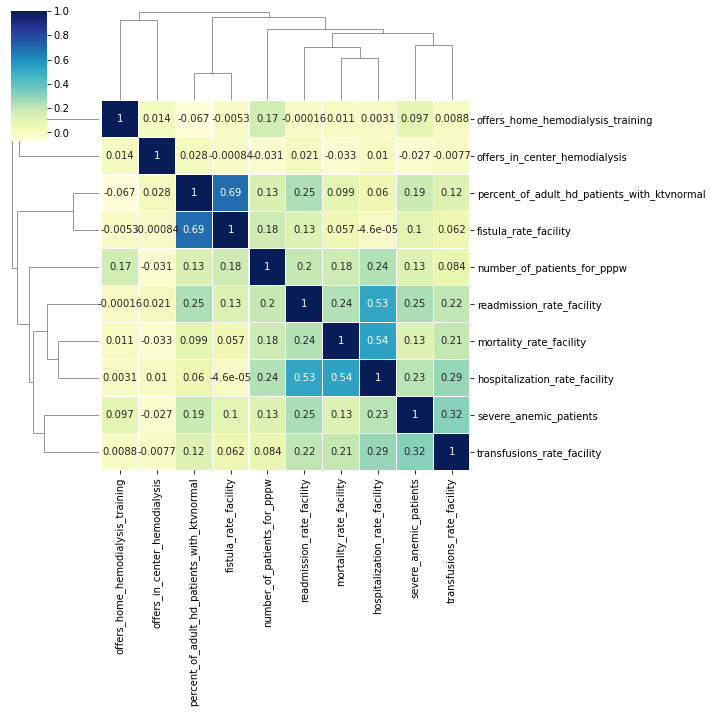

In [11]:
plt.figure(figsize= (20,14))
sns.clustermap(kcc2.corr(), cmap= "YlGnBu",linewidths= .1, annot = True )

# PairPlots

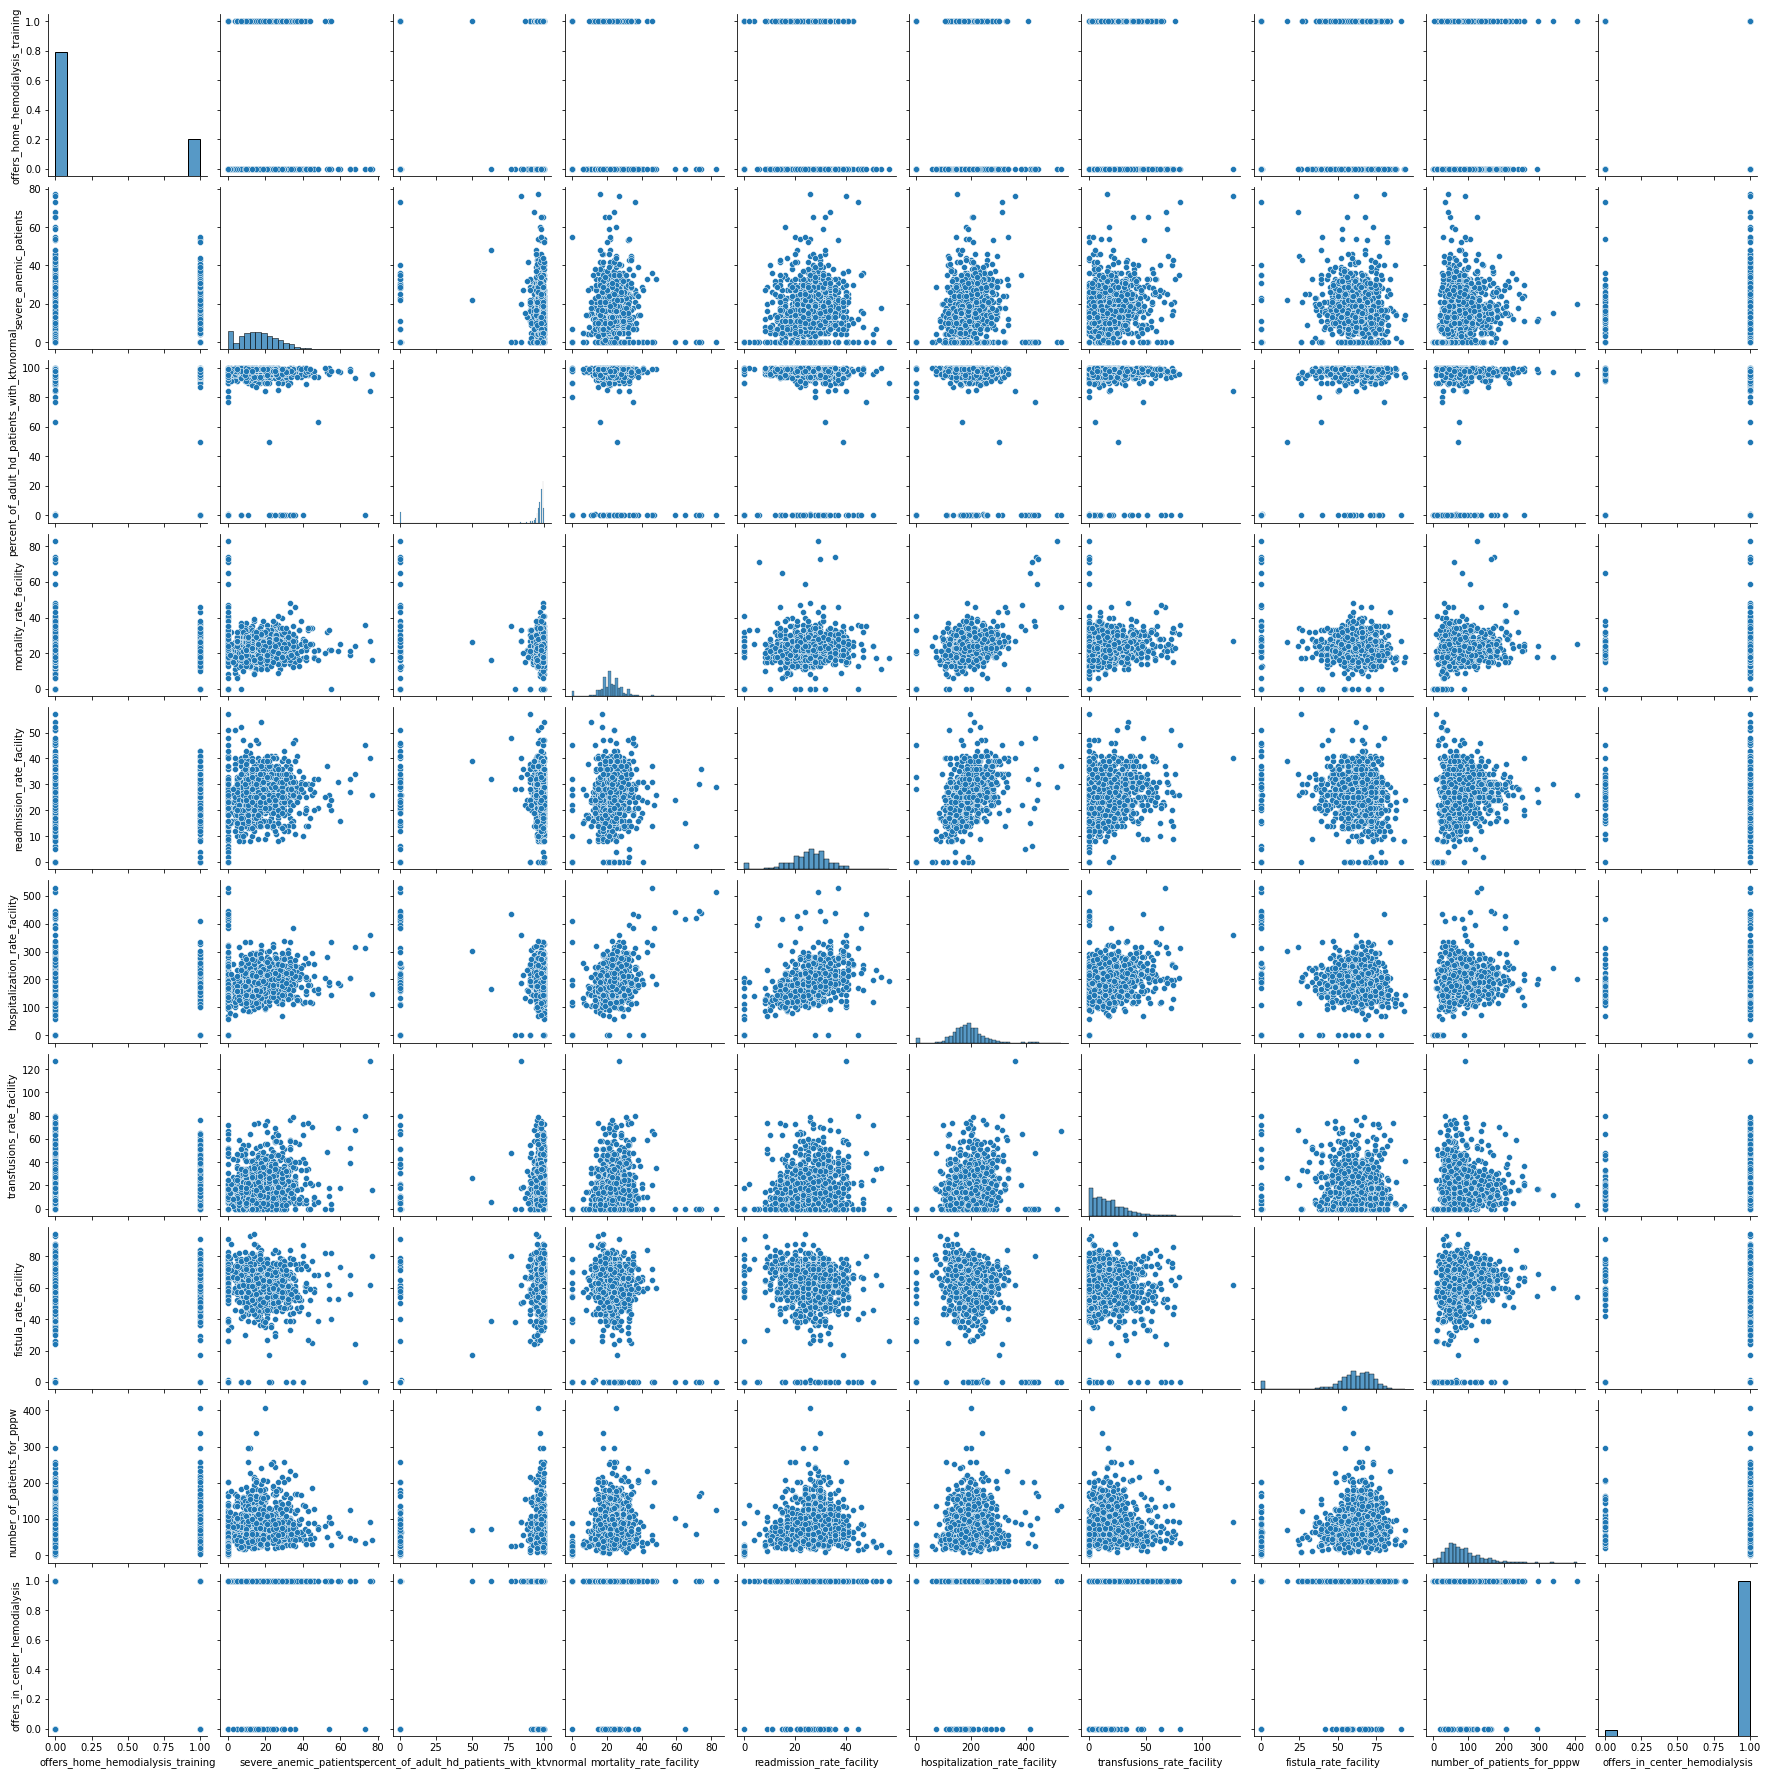

In [12]:
sns.pairplot(kcc2)

## Decision Tree

# Test Train Split

Creating Preliminary Decision Tree

In [13]:
kcc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1035
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   offers_home_hemodialysis_training            1036 non-null   int64
 1   severe_anemic_patients                       1036 non-null   int64
 2   percent_of_adult_hd_patients_with_ktvnormal  1036 non-null   int64
 3   mortality_rate_facility                      1036 non-null   int64
 4   readmission_rate_facility                    1036 non-null   int64
 5   hospitalization_rate_facility                1036 non-null   int64
 6   transfusions_rate_facility                   1036 non-null   int64
 7   fistula_rate_facility                        1036 non-null   int64
 8   number_of_patients_for_pppw                  1036 non-null   int64
 9   offers_in_center_hemodialysis                1036 non-null   int64
dtypes: int64(10)
memory usag

In [14]:
x = kcc2.drop('mortality_rate_facility', axis=1)
y = kcc2['mortality_rate_facility']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [16]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [17]:
treePredictions = decisionTree.predict(x_test)

In [18]:
preds= decisionTree.predict(x_test)

In [19]:
preds

array([23, 23, 22,  0, 23, 38, 32,  0, 35, 33,  0, 13, 19, 19, 21, 17, 21,
       17, 28, 24, 16, 29, 22, 19,  6, 36, 31, 25, 23, 32, 24, 20, 16, 20,
       18, 16, 27, 18, 26, 29, 18, 23, 22, 20, 16, 32,  0, 27,  0, 18, 34,
       19, 32, 23, 24, 22, 27, 21, 16, 21, 23, 23, 14, 18, 23, 24, 26, 25,
       28, 26, 23, 19, 19, 21, 20, 12, 21, 23, 25, 18, 18, 16, 20, 21, 24,
       17, 17, 26, 29, 27, 32, 28, 31, 21, 21, 20, 21, 21, 27, 14, 19, 22,
       27, 25, 23, 24, 28, 32, 27, 34, 22, 19, 22, 25, 28, 19, 18, 21, 22,
       22, 11,  0, 31, 26, 18, 29, 32, 38, 27, 27, 20, 24, 23, 25, 18, 19,
       20, 30, 19, 20, 24, 32, 26, 29, 25,  0, 26, 24,  0, 22, 19, 21, 20,
       31, 23, 21, 22, 24, 24, 21, 83,  6, 17, 19, 22, 18, 29, 23, 18, 29,
       24, 29, 21, 20, 26, 43, 33, 25, 21, 22, 25, 21, 18, 23, 27, 31, 24,
       33, 19, 25, 27, 23, 27, 17, 26, 28, 18, 23, 23, 21, 18, 22, 19, 18,
       24, 21, 33, 22, 17, 32, 19, 32, 25, 21,  0, 26, 20, 15, 25, 20, 21,
       30, 23, 28, 28, 22

In [20]:
print(confusion_matrix(y_test, treePredictions))

[[8 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           6       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         8
          15       0.50      0.14      0.22         7
          16       0.17      0.09      0.12        11
          17       0.00      0.00      0.00        13
          18       0.00      0.00      0.00        16
          19       0.10      0.09      0.09        23
          20       0.00      0.00      0.00        23
          21       0.09      0.12      0.11        24
          22       0.00      0.00      0.00        26
          23       0.17      0.14      0.16        28
          24       0.14      0.17      0.15        18
          25       0.06    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

#not that accurate outside of offers_home_hemodialysis_training which is 67 % in precision

# Random Forest 

Initial Random Forest Model

In [22]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

Evaluate Model Fit

In [23]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[8 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00        11
          17       0.00      0.00      0.00        13
          18       0.00      0.00      0.00        16
          19       0.12      0.13      0.12        23
          20       0.08      0.04      0.06        23
          21       0.08      0.17      0.11        24
          22   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

the results mimicked the same as the Decision tree

In [24]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.09646302250803858
4 : 0.08360128617363344
5 : 0.09967845659163987
8 : 0.09646302250803858
10 : 0.09967845659163987
20 : 0.0932475884244373
50 : 0.09646302250803858
75 : 0.08360128617363344
100 : 0.07395498392282958
250 : 0.09003215434083602
500 : 0.08681672025723473


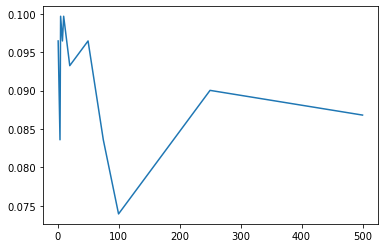

In [25]:
plt.plot(n_estimators_array, results)

In [64]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [65]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [60]:
rf_random.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [67]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=2, max_features="log2", max_depth=10)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       n_estimators=10)

In [63]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[8 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00        11
          17       0.00      0.00      0.00        13
          18       0.00      0.00      0.00        16
          19       0.06      0.09      0.07        23
          20       0.00      0.00      0.00        23
          21       0.11      0.21      0.14        24
          22       0.21      0.15      0.18        26
          23       0.15      0.21      0.18        28
          24   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

Feature Importance

In [68]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

offers_home_hemodialysis_training              0.028931
severe_anemic_patients                         0.125149
percent_of_adult_hd_patients_with_ktvnormal    0.079496
readmission_rate_facility                      0.160902
hospitalization_rate_facility                  0.197582
transfusions_rate_facility                     0.110462
fistula_rate_facility                          0.142935
number_of_patients_for_pppw                    0.151518
offers_in_center_hemodialysis                  0.003024
dtype: float64

In [69]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

hospitalization_rate_facility                  0.197582
readmission_rate_facility                      0.160902
number_of_patients_for_pppw                    0.151518
fistula_rate_facility                          0.142935
severe_anemic_patients                         0.125149
transfusions_rate_facility                     0.110462
percent_of_adult_hd_patients_with_ktvnormal    0.079496
offers_home_hemodialysis_training              0.028931
offers_in_center_hemodialysis                  0.003024
dtype: float64


<AxesSubplot:>

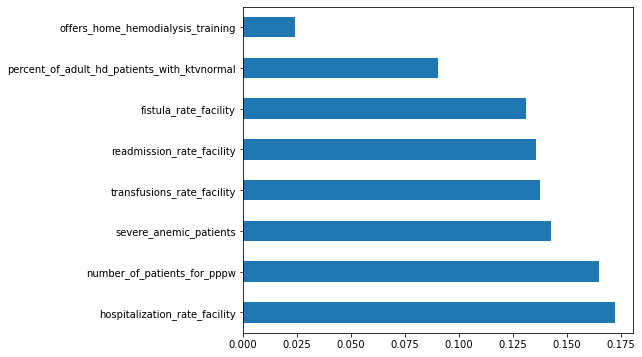

In [66]:
feature_importances.plot(kind='barh', figsize=(7,6))

# Regression

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hospitalization_rate_facility', ylabel='Density'>

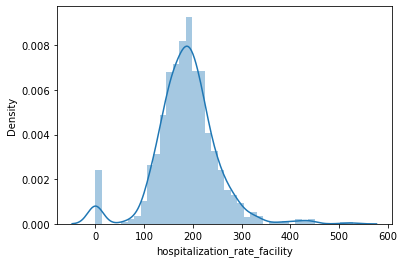

In [68]:
sns.distplot(kcc2['hospitalization_rate_facility'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mortality_rate_facility', ylabel='Density'>

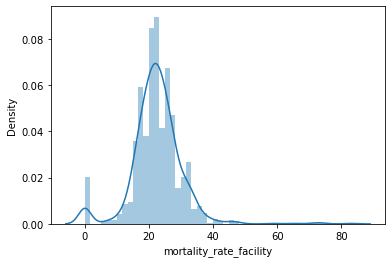

In [71]:
sns.distplot(kcc2['mortality_rate_facility'])

In [70]:
x = (kcc2['hospitalization_rate_facility'])
y = (kcc2['mortality_rate_facility'])

In [71]:
model = sm.OLS(y,x).fit()

In [72]:
print(model)

Test for Homoscedasticity

In [73]:
pred_val = model.fittedvalues.copy()
true_val = kcc2['mortality_rate_facility'].values.copy()
residual = true_val - pred_val

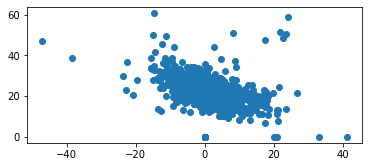

In [74]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

Scatter Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

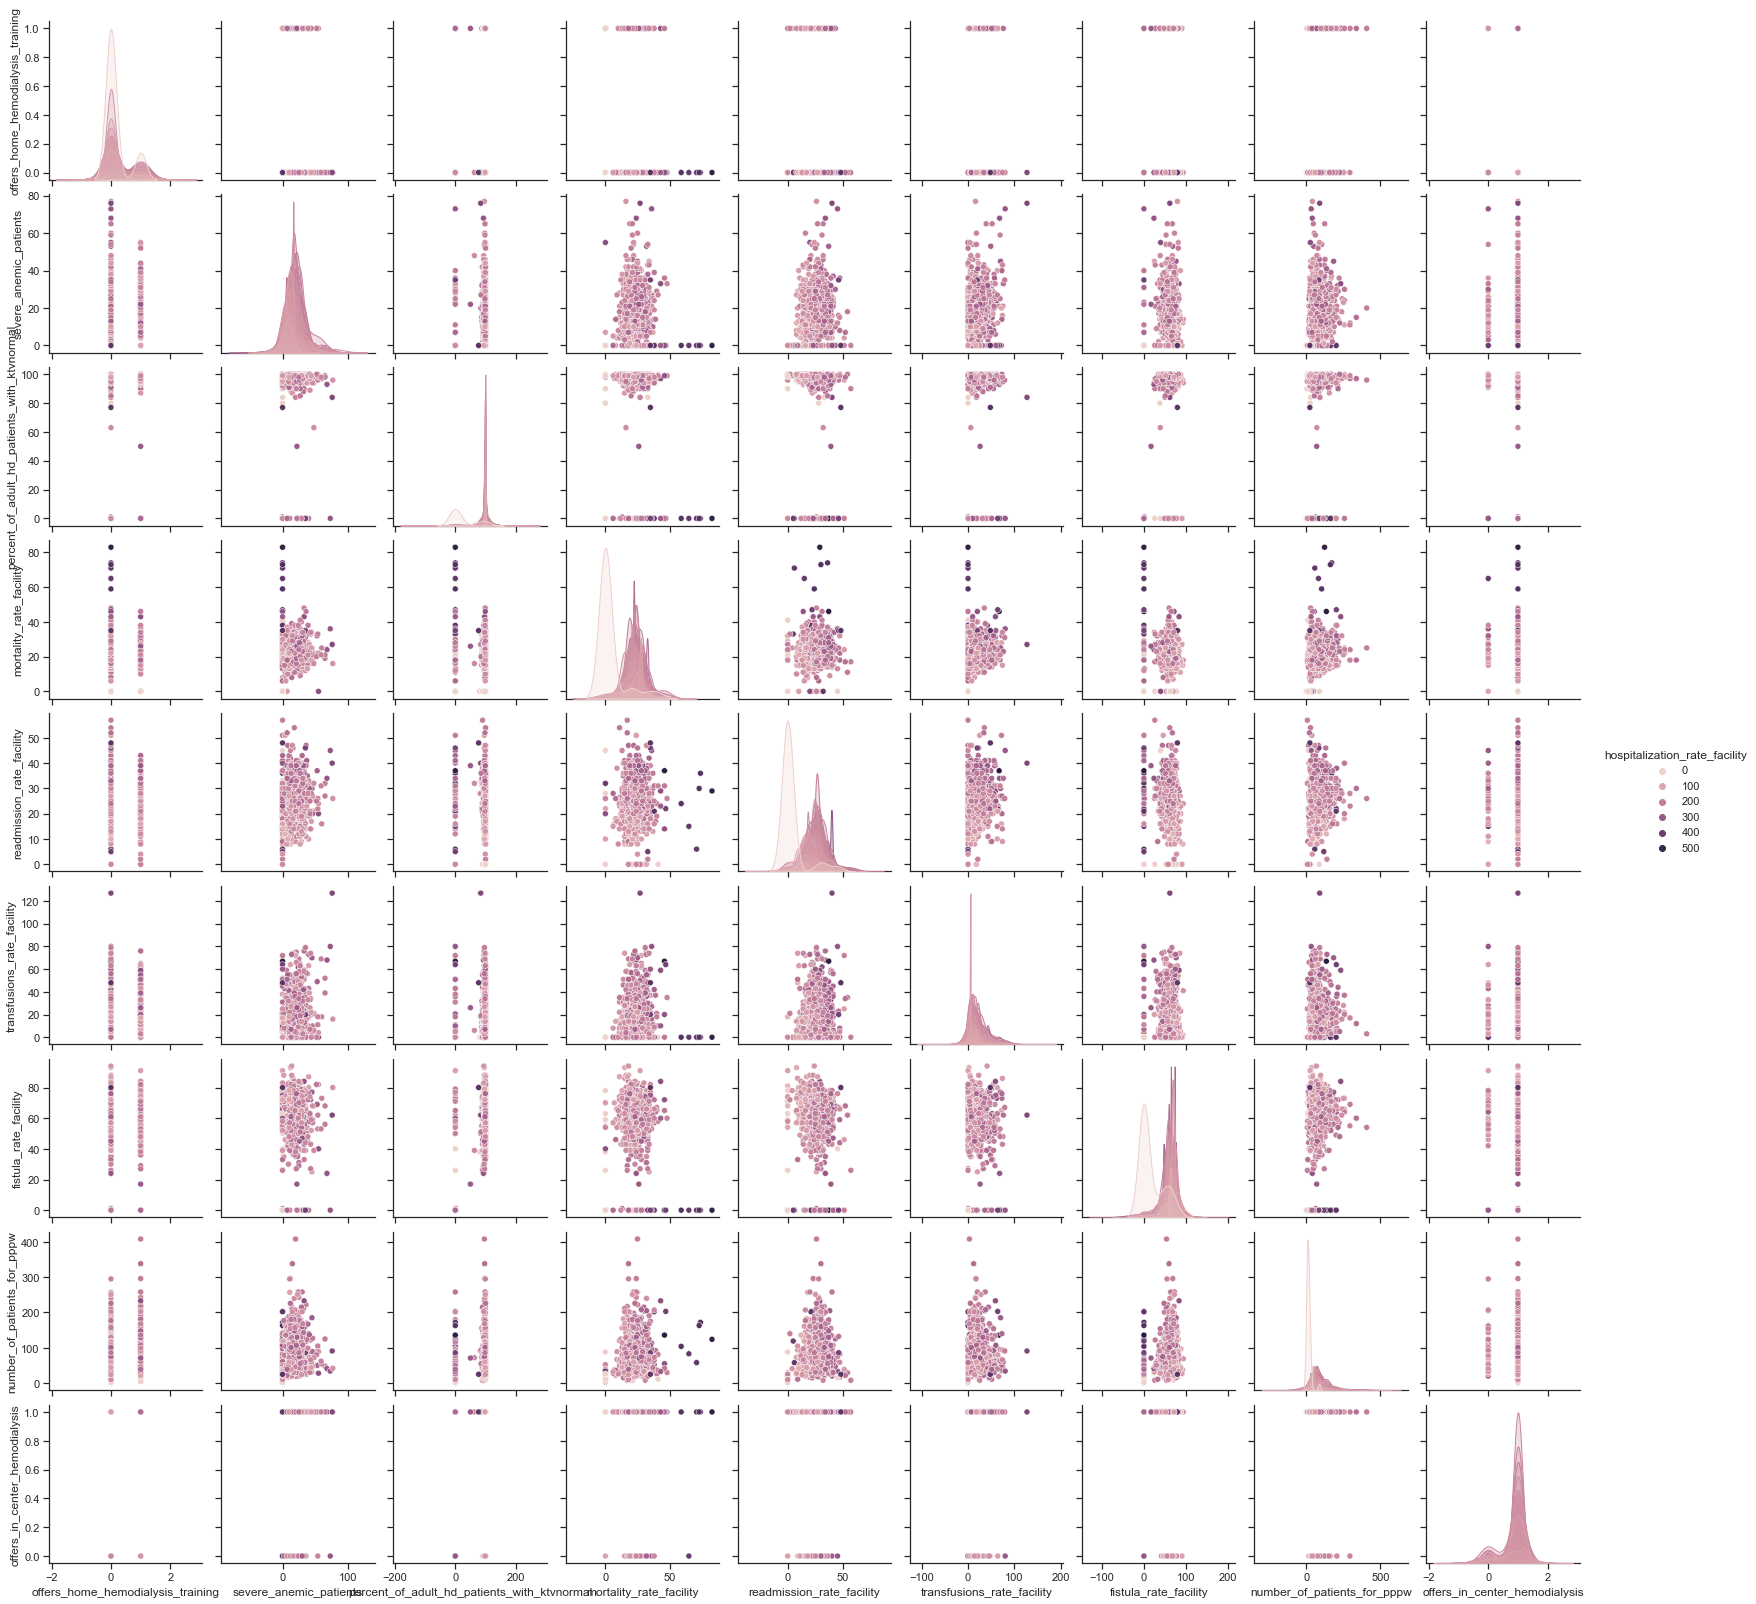

In [83]:
sns.set_theme(style="ticks")
sns.pairplot(kcc2, hue= "hospitalization_rate_facility")

In [77]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=2.685248957420375, pvalue=0.007363815726181546)

Testing for Multicollinearity

In [80]:
kcc2.corr()

,offers_home_hemodialysis_training,severe_anemic_patients,percent_of_adult_hd_patients_with_ktvnormal,mortality_rate_facility,readmission_rate_facility,hospitalization_rate_facility,transfusions_rate_facility,fistula_rate_facility,number_of_patients_for_pppw
offers_home_hemodialysis_training,1.000000,0.097216,-0.066934,0.010964,-0.000160,0.003102,0.008789,-0.005297,0.170211
severe_anemic_patients,0.097216,1.000000,0.186460,0.127118,0.250682,0.225423,0.320435,0.103628,0.126208
percent_of_adult_hd_patients_with_ktvnormal,-0.066934,0.186460,1.000000,0.099075,0.245888,0.059521,0.123031,0.694736,0.134318
mortality_rate_facility,0.010964,0.127118,0.099075,1.000000,0.238136,0.539168,0.207105,0.056718,0.181254
readmission_rate_facility,-0.000160,0.250682,0.245888,0.238136,1.000000,0.527144,0.215913,0.128533,0.202850
hospitalization_rate_facility,0.003102,0.225423,0.059521,0.539168,0.527144,1.000000,0.288423,-0.000046,0.238010
transfusions_rate_facility,0.008789,0.320435,0.123031,0.207105,0.215913,0.288423,1.000000,0.061687,0.083583
fistula_rate_facility,-0.005297,0.103628,0.694736,0.056718,0.128533,-0.000046,0.061687,1.000000,0.180783
number_of_patients_for_pppw,0.170211,0.126208,0.134318,0.181254,0.202850,0.238010,0.083583,0.180783,1.000000


Screening for Outliers

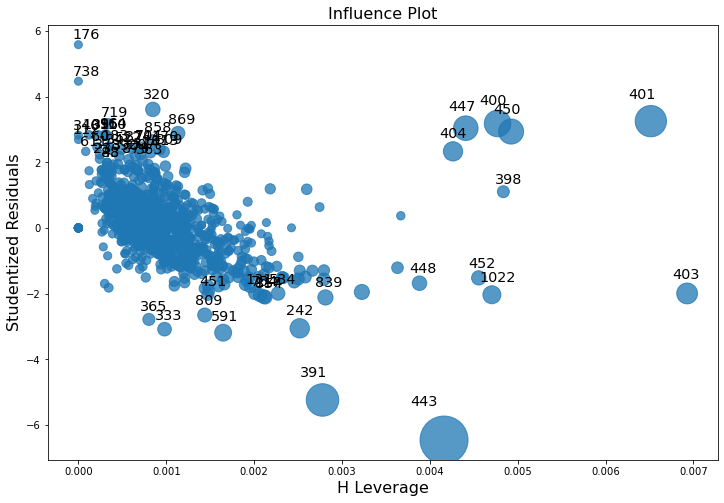

In [81]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [84]:
#there are many outliers not all can be descerned

In [82]:
infl = model.get_influence()
print(infl.summary_frame())

      dfb_hospitalization_rate_facility   cooks_d  standard_resid  hat_diag  \
0                             -0.067351  0.004533       -1.302859  0.002663   
1                              0.024755  0.000613        0.827797  0.000894   
2                             -0.039356  0.001548       -1.237309  0.001010   
3                             -0.013736  0.000189       -0.362118  0.001438   
4                              0.022554  0.000509        1.128303  0.000399   
...                                 ...       ...             ...       ...   
1031                          -0.048371  0.002339       -1.124904  0.001845   
1032                          -0.063622  0.004042       -1.564870  0.001648   
1033                           0.028434  0.000807        1.504747  0.000357   
1034                          -0.007670  0.000059       -0.218571  0.001231   
1035                           0.021247  0.000451        1.163723  0.000333   

      dffits_internal  student_resid    dffits  
0 

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     mortality_rate_facility   R-squared (uncentered):                   0.919
Model:                                 OLS   Adj. R-squared (uncentered):              0.919
Method:                      Least Squares   F-statistic:                              1299.
Date:                     Wed, 03 Nov 2021   Prob (F-statistic):                        0.00
Time:                             15:24:37   Log-Likelihood:                         -3453.9
No. Observations:                     1036   AIC:                                      6926.
Df Residuals:                         1027   BIC:                                      6970.
Df Model:                                9                                                  
Covariance Type:                 nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
offers_home_hemodialysis_training               0.3692      0.516      0.716      0.474      -0.643       1.381
severe_anemic_patients                         -0.0067      0.020     -0.337      0.736      -0.045       0.032
percent_of_adult_hd_patients_with_ktvnormal     0.0389      0.012      3.173      0.002       0.015       0.063
readmission_rate_facility                      -0.0683      0.029     -2.343      0.019      -0.126      -0.011
hospitalization_rate_facility                   0.0770      0.004     19.502      0.000       0.069       0.085
transfusions_rate_facility                      0.0273      0.014      1.888      0.059      -0.001       0.056
fistula_rate_facility                           0.0250      0.017      1.479      0.140      -0.008       0.058
number_of_patients_for_pppw                     0.0104      0.005      2.205      0.028       0.001       0.020
offers_in_center_hemodialysis                   3.4583      0.786      4.400      0.000       1.916       5.001
==============================================================================
Omnibus:                      244.440   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1347.954
Skew:                           0.966   Prob(JB):                    1.97e-293
Kurtosis:                       8.244   Cond. No.                         901.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""